In [38]:
import os
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
size = 957,526

((526, 957, 3), (526, 957, 3))


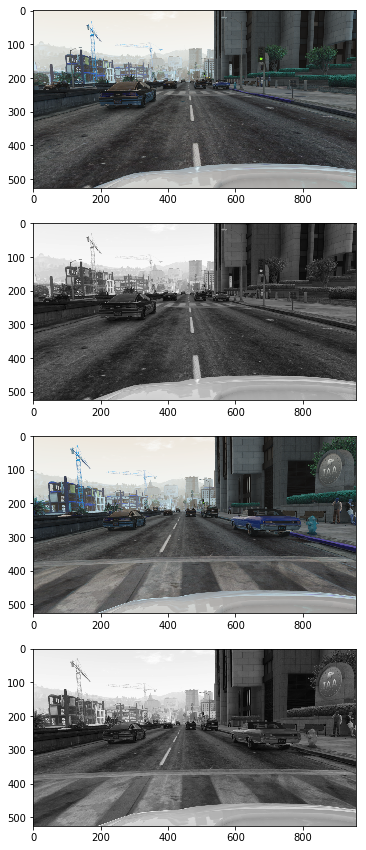

In [58]:
dataset_path = '/home/mlyko/data/gta/images/'

frames = [
    dataset_path + '00012.png',
    dataset_path + '00013.png'
]

old = cv2.imread(frames[0])
if old is None:
    raise Exception("File not found")

old = cv2.resize(old, size)

frame = cv2.imread(frames[1])
if frame is None:
    raise Exception("File not found")

frame = cv2.resize(frame, size)

print(old.shape, frame.shape)

old_gray = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(4, 1, figsize=(20, 15))

ax[0].imshow(old)
ax[1].imshow(old_gray, cmap='gray')
ax[2].imshow(frame)
ax[3].imshow(frame_gray, cmap='gray')


('computation ', 0.011751890182495117)


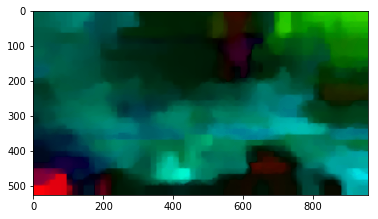

In [61]:
disFlow = cv2.optflow.createOptFlow_DIS()

start_time = time.time()
flow = disFlow.calc(old_gray, frame_gray, None)
end_time = time.time() - start_time

print("computation ", end_time)

mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

hsv = np.zeros_like(old)
hsv[..., 1] = 255
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.imshow(bgr)


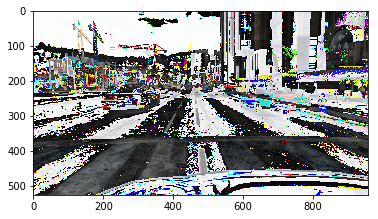

In [67]:
diff = frame - old
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2RGB)
plt.imshow(diff)